In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

##histogram equalization

UNEDITED IMAGE


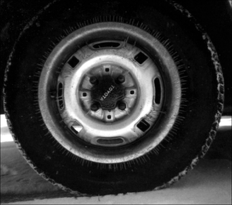

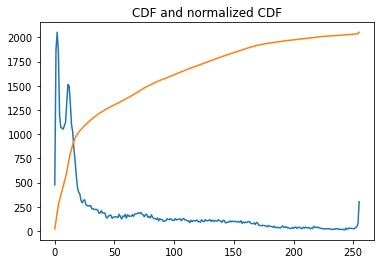


HISTOGRAM EQUALIZED IMAGE


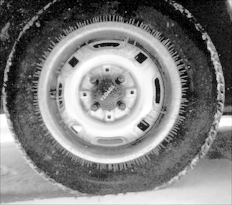

In [ ]:
def hist_equalize(img):
    # Compute histogram
    hist, bins = np.histogram(img.flatten(), 256, [0, 255])
    plt.plot(hist)

    # Compute cumulative distribution function
    cdf = hist.cumsum()

    # Normalize CDF to [0, 255]
    cdf_normalized = cdf * hist.max() / cdf.max()

    plt.plot(cdf_normalized)
    plt.title("CDF and normalized CDF")
    plt.show()

    # Create mapping function
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    # Apply mapping function to image
    img_eq = cdf[img]
    return img_eq

# Load image
print('UNEDITED IMAGE')
img = cv2.imread('tire.pnm', 0)
cv2_imshow(img)
print()
img_eq = hist_equalize(img)
print('\nHISTOGRAM EQUALIZED IMAGE')
cv2_imshow(img_eq)


##Log transformation

UNEDITED IMAGE


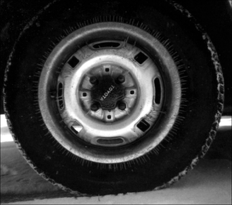


LOG TRANSFORMED IMAGE


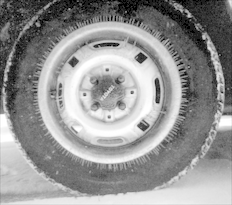

In [ ]:
def log_transformation(img):
    # Apply log mapping to input image
    img_log = np.log(img.astype('float32') + 1)
    img_log = (img_log * 255 / np.max(img_log)).astype('uint8')

    return img_log

# Load image
img = cv2.imread('tire.pnm', 0)
print("UNEDITED IMAGE")
cv2_imshow(img)
img_log = log_transformation(img)
print("\nLOG TRANSFORMED IMAGE")
cv2_imshow(img_log)

##Rotating the image by angle theta

UNEDITED IMAGE


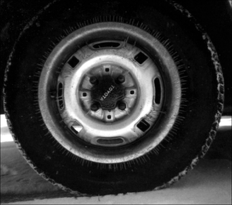


ROTATED IMAGE BY 60 degrees


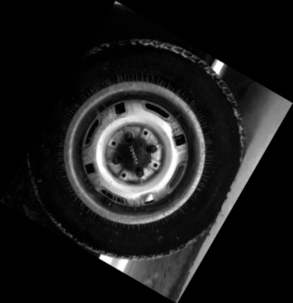

In [ ]:
import math
def rotate_image(image, angle):
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate rotation matrix
    matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

    # Calculate bounding box for rotated image
    cos = np.abs(matrix[0, 0])
    sin = np.abs(matrix[0, 1])
    new_width = int((height * sin) + (width * cos))
    new_height = int((height * cos) + (width * sin))
    matrix[0, 2] += (new_width/2) - (width/2)
    matrix[1, 2] += (new_height/2) - (height/2)

    # Perform rotation
    rotated_image = cv2.warpAffine(image, matrix, (new_width, new_height), borderMode=cv2.BORDER_CONSTANT, borderValue=0)

    # Crop black edges caused by rotation
    angle_radian = math.radians(angle)
    w = width * abs(math.cos(angle_radian)) + height * abs(math.sin(angle_radian))
    h = height * abs(math.cos(angle_radian)) + width * abs(math.sin(angle_radian))
    x = (new_width - w) / 2
    y = (new_height - h) / 2
    rotated_image = rotated_image[int(y):int(y+h), int(x):int(x+w)]

    return rotated_image

print("UNEDITED IMAGE")
img = cv2.imread('tire.pnm', 0)
cv2_imshow(img)
print("\nROTATED IMAGE BY 60 degrees")
img_log = rotate_image(img,60)
cv2_imshow(img_log)


##Gaussian filter using convolution

In [ ]:
def gaussian_kernel(size, sigma):
    # Calculate the Gaussian kernel using the given size and sigma
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2

    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalize the kernel so that the sum of all values is 1
    kernel = kernel / np.sum(kernel)

    return kernel

def convolve(image, kernel):
    # Create a padded version of the input image
    padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

    # Create a new image of the same size as the input image
    output_image = np.zeros_like(image, dtype=np.float32)

    # Loop over every pixel in the input image
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            # Extract the 3x3 neighborhood around the current pixel
            neighborhood = padded_image[i-1:i+2, j-1:j+2]

            # Convolve the neighborhood with the kernel
            output_image[i-1, j-1] = np.sum(neighborhood * kernel)

    return output_image

def gaussian_filter(image, size, sigma):
    # Generate the Gaussian kernel
    kernel = gaussian_kernel(size, sigma)

    # Convolve the image with the kernel
    filtered_image = convolve(image, kernel)

    # Convert the filtered image to uint8
    filtered_image = cv2.convertScaleAbs(filtered_image)

    return filtered_image

Unedited image


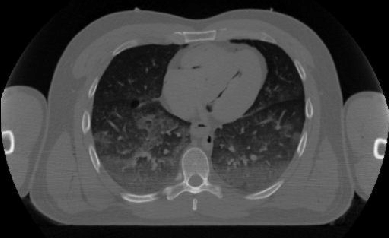


Image processed through Gaussian filter


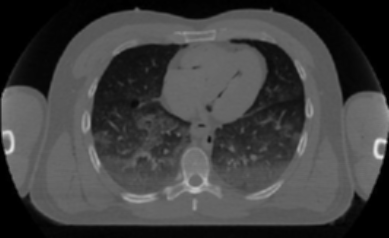

In [ ]:
img = cv2.imread('ct_scan.pnm', 0)
print("Unedited image")
cv2_imshow(img)
img_filter = gaussian_filter(img,3,100)
print("\nImage processed through Gaussian filter")
cv2_imshow(img_filter)

##Median filter

In [ ]:
def median_filter(image):
    # Create a padded version of the input image
    padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)

    # Create a new image of the same size as the input image
    output_image = np.zeros_like(image)

    # Loop over every pixel in the input image
    for i in range(1, image.shape[0] + 1):
        for j in range(1, image.shape[1] + 1):
            # Extract the 3x3 neighborhood around the current pixel
            neighborhood = padded_image[i-1:i+2, j-1:j+2]

            # Calculate the median value of the neighborhood
            median_value = np.median(neighborhood)

            # Set the current pixel in the output image to the median value
            output_image[i-1, j-1] = median_value

    return output_image

Unedited image


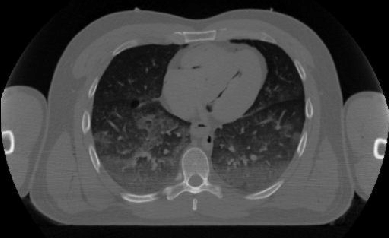


Image processed through Median filter


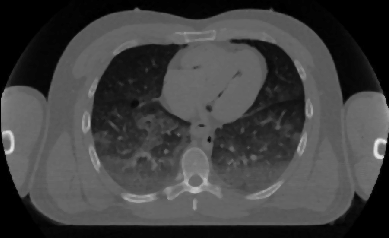

In [ ]:
img = cv2.imread('ct_scan.pnm', 0)
print("Unedited image")
cv2_imshow(img)
img_filter = median_filter(img)
print("\nImage processed through Median filter")
cv2_imshow(img_filter)

##Results

unedited image


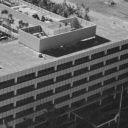


histogram equalization


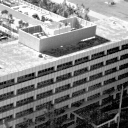


log transformation


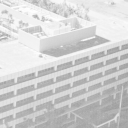


gaussian filter applied


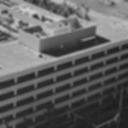


median filter applied


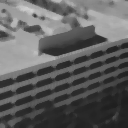


image rotated by 60 degrees


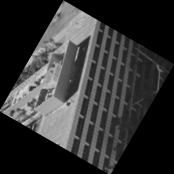

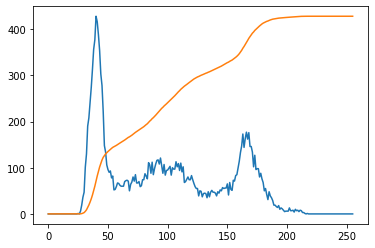

In [ ]:
img = cv2.imread('building.pnm', 0)
print("unedited image")
cv2_imshow(img)
print()

res1 = hist_equalize(img)
print("histogram equalization")
cv2_imshow(res1)
print()

res2 = log_transformation(img)
print("log transformation")
cv2_imshow(res2)
print()

res3 = gaussian_filter(img,3,100)
print("gaussian filter applied")
cv2_imshow(res3)
print()

res4 = median_filter(img)
print("median filter applied")
cv2_imshow(res4)
print()

res5 = rotate_image(img, 60)
print("image rotated by 60 degrees")
cv2_imshow(res5)
print()

unedited image


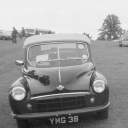


histogram equalization


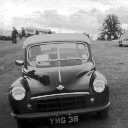


log transformation


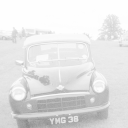


gaussian filter applied


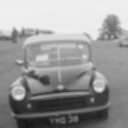


median filter applied


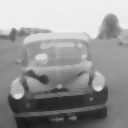


image rotated by 60 degrees


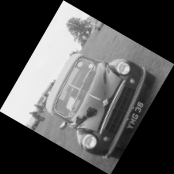

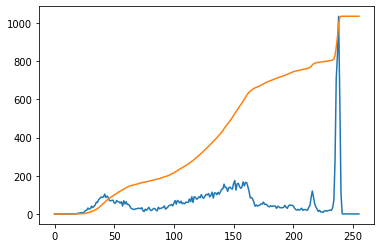

In [ ]:
img = cv2.imread('auto.pnm', 0)
print("unedited image")
cv2_imshow(img)
print()

res1 = hist_equalize(img)
print("histogram equalization")
cv2_imshow(res1)
print()

res2 = log_transformation(img)
print("log transformation")
cv2_imshow(res2)
print()

res3 = gaussian_filter(img,3,100)
print("gaussian filter applied")
cv2_imshow(res3)
print()

res4 = median_filter(img)
print("median filter applied")
cv2_imshow(res4)
print()

res5 = rotate_image(img, 60)
print("image rotated by 60 degrees")
cv2_imshow(res5)
print()

unedited image


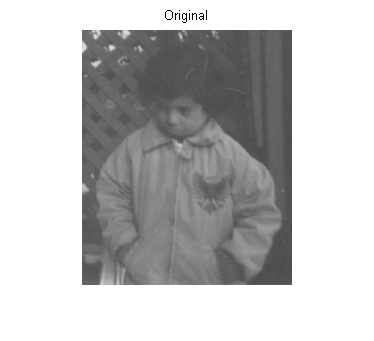


histogram equalization


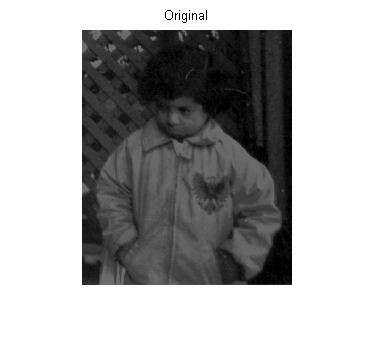


log transformation


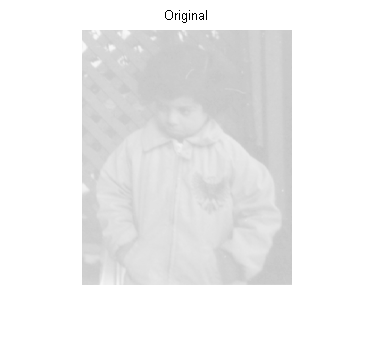


gaussian filter applied


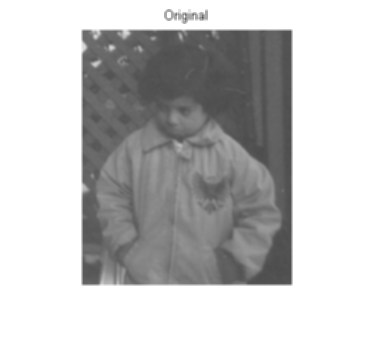


median filter applied


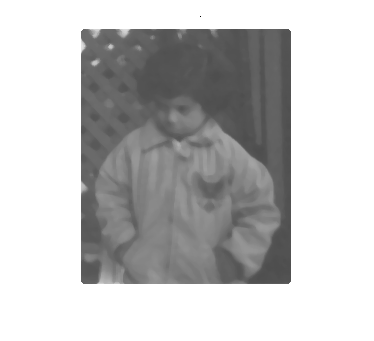


image rotated by 60 degrees


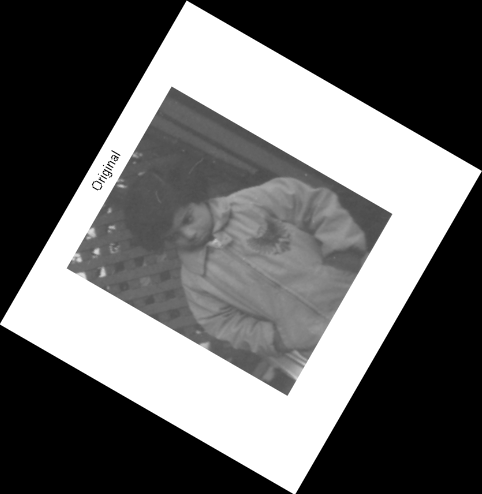

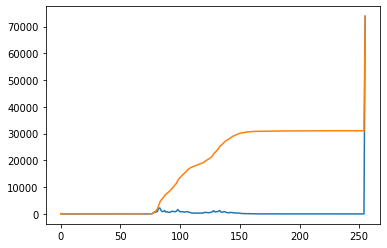

In [ ]:
img = cv2.imread('child.pnm', 0)
print("unedited image")
cv2_imshow(img)
print()

res1 = hist_equalize(img)
print("histogram equalization")
cv2_imshow(res1)
print()

res2 = log_transformation(img)
print("log transformation")
cv2_imshow(res2)
print()

res3 = gaussian_filter(img,3,100)
print("gaussian filter applied")
cv2_imshow(res3)
print()

res4 = median_filter(img)
print("median filter applied")
cv2_imshow(res4)
print()

res5 = rotate_image(img, 60)
print("image rotated by 60 degrees")
cv2_imshow(res5)
print()


unedited image


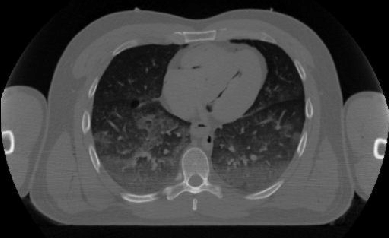


histogram equalization


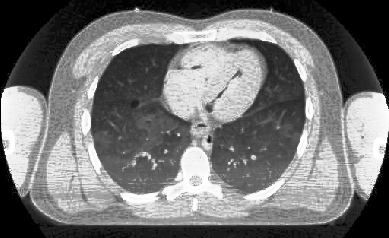


log transformation


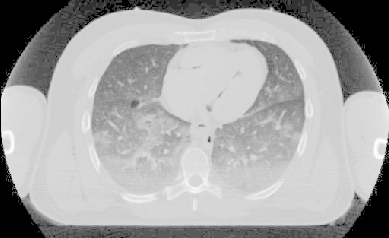


gaussian filter applied


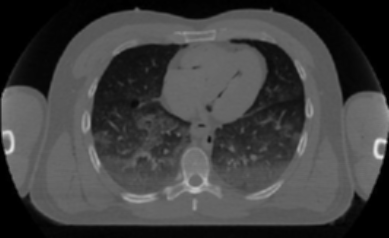


median filter applied


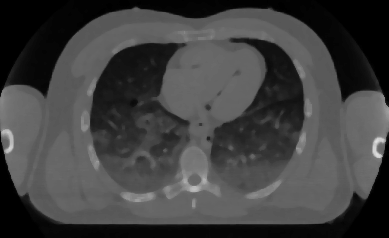


image rotated by 60 degrees


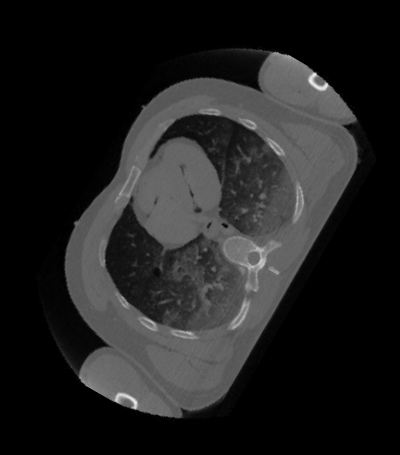

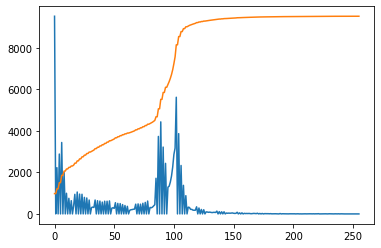

In [ ]:
img = cv2.imread('ct_scan.pnm', 0)
print("unedited image")
cv2_imshow(img)
print()

res1 = hist_equalize(img)
print("histogram equalization")
cv2_imshow(res1)
print()

res2 = log_transformation(img)
print("log transformation")
cv2_imshow(res2)
print()

res3 = gaussian_filter(img,3,100)
print("gaussian filter applied")
cv2_imshow(res3)
print()

res4 = median_filter(img)
print("median filter applied")
cv2_imshow(res4)
print()

res5 = rotate_image(img, 60)
print("image rotated by 60 degrees")
cv2_imshow(res5)
print()

unedited image


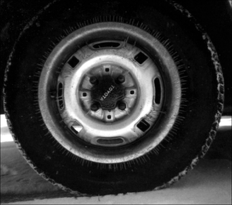


histogram equalization


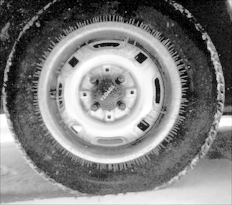


log transformation


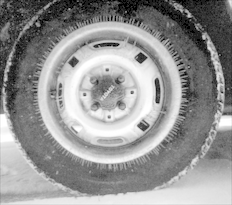


gaussian filter applied


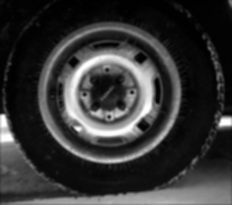


median filter applied


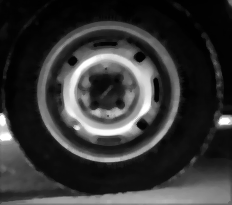


image rotated by 60 degrees


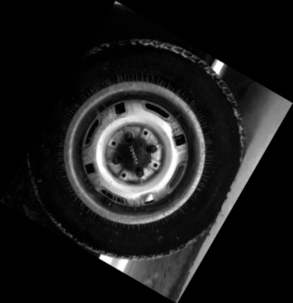

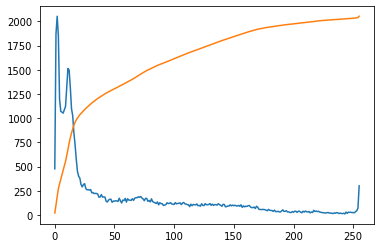

In [ ]:
img = cv2.imread('tire.pnm', 0)
print("unedited image")
cv2_imshow(img)
print()

res1 = hist_equalize(img)
print("histogram equalization")
cv2_imshow(res1)
print()

res2 = log_transformation(img)
print("log transformation")
cv2_imshow(res2)
print()

res3 = gaussian_filter(img,3,100)
print("gaussian filter applied")
cv2_imshow(res3)
print()

res4 = median_filter(img)
print("median filter applied")
cv2_imshow(res4)
print()

res5 = rotate_image(img, 60)
print("image rotated by 60 degrees")
cv2_imshow(res5)
print()


##Noise analysis

original image


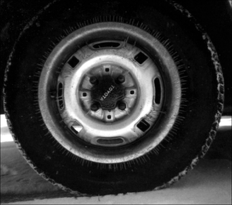


noisey image


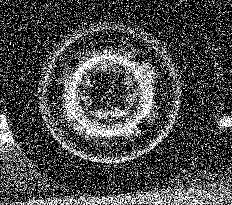


gaussian filtering on noisey image


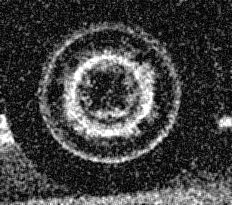


median filtering on noisey image


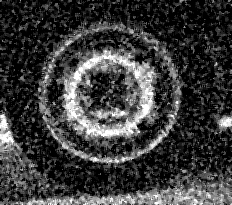

In [ ]:
# noise analysis
# adding noise to the image

print("original image")
img = cv2.imread('tire.pnm', 0)
cv2_imshow(img)

# create noise with mean=0 and standard deviation=100
noise = np.random.normal(loc=0, scale=100, size=img.shape)

print("\nnoisey image")
# add noise to image
noisy_img = img + noise
cv2_imshow(noisy_img)

# filtering the noisy image
print("\ngaussian filtering on noisey image")
img_filter = gaussian_filter(noisy_img,3,100)
cv2_imshow(img_filter)

print("\nmedian filtering on noisey image")
img_filter = median_filter(noisy_img)
cv2_imshow(img_filter)


original image


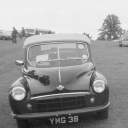


noisey image


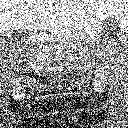


gaussian filtering on noisey image


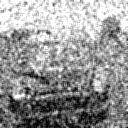


median filtering on noisey image


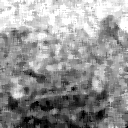

In [ ]:
# noise analysis
# adding noise to the image

print("original image")
img = cv2.imread('auto.pnm', 0)
cv2_imshow(img)

# create noise with mean=0 and standard deviation=100
noise = np.random.normal(loc=0, scale=100, size=img.shape)

print("\nnoisey image")
# add noise to image
noisy_img = img + noise
cv2_imshow(noisy_img)

# filtering the noisy image
print("\ngaussian filtering on noisey image")
img_filter = gaussian_filter(noisy_img,3,100)
cv2_imshow(img_filter)

print("\nmedian filtering on noisey image")
img_filter = median_filter(noisy_img)
cv2_imshow(img_filter)


original image


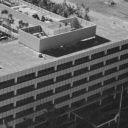


noisey image


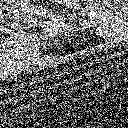


gaussian filtering on noisey image


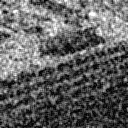


median filtering on noisey image


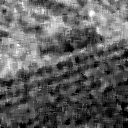

In [ ]:
# noise analysis
# adding noise to the image

print("original image")
img = cv2.imread('building.pnm', 0)
cv2_imshow(img)

# create noise with mean=0 and standard deviation=100
noise = np.random.normal(loc=0, scale=100, size=img.shape)

print("\nnoisey image")
# add noise to image
noisy_img = img + noise
cv2_imshow(noisy_img)

# filtering the noisy image
print("\ngaussian filtering on noisey image")
img_filter = gaussian_filter(noisy_img,3,100)
cv2_imshow(img_filter)

print("\nmedian filtering on noisey image")
img_filter = median_filter(noisy_img)
cv2_imshow(img_filter)


original image


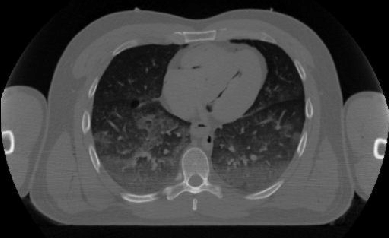


noisey image


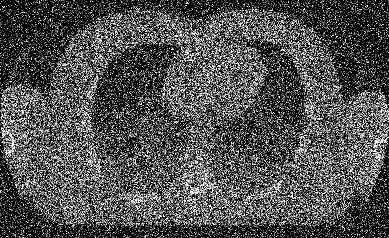


gaussian filtering on noisey image


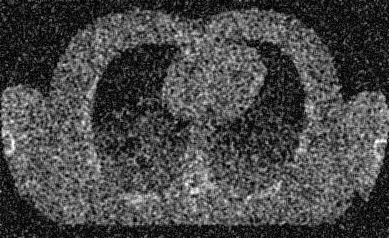


median filtering on noisey image


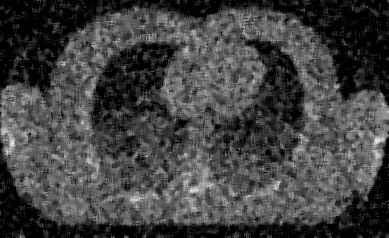

In [ ]:
# noise analysis
# adding noise to the image

print("original image")
img = cv2.imread('ct_scan.pnm', 0)
cv2_imshow(img)

# create noise with mean=0 and standard deviation=100
noise = np.random.normal(loc=0, scale=100, size=img.shape)

print("\nnoisey image")
# add noise to image
noisy_img = img + noise
cv2_imshow(noisy_img)

# filtering the noisy image
print("\ngaussian filtering on noisey image")
img_filter = gaussian_filter(noisy_img,3,100)
cv2_imshow(img_filter)

print("\nmedian filtering on noisey image")
img_filter = median_filter(noisy_img)
cv2_imshow(img_filter)


original image


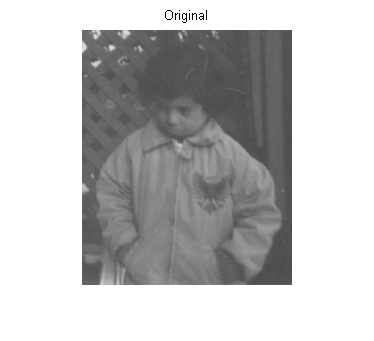


noisey image


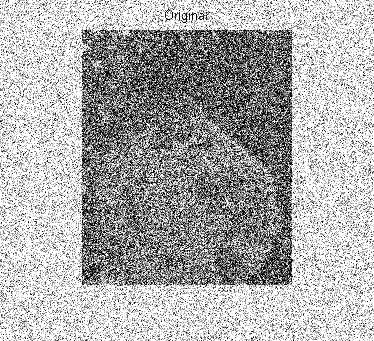


gaussian filtering on noisey image


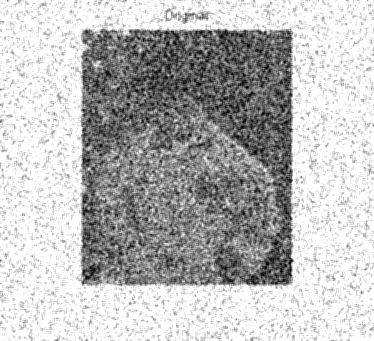


median filtering on noisey image


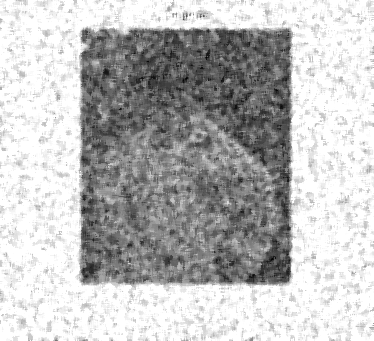

In [ ]:
# noise analysis
# adding noise to the image

print("original image")
img = cv2.imread('child.pnm', 0)
cv2_imshow(img)

# create noise with mean=0 and standard deviation=100
noise = np.random.normal(loc=0, scale=100, size=img.shape)

print("\nnoisey image")
# add noise to image
noisy_img = img + noise
cv2_imshow(noisy_img)

# filtering the noisy image
print("\ngaussian filtering on noisey image")
img_filter = gaussian_filter(noisy_img,3,100)
cv2_imshow(img_filter)

print("\nmedian filtering on noisey image")
img_filter = median_filter(noisy_img)
cv2_imshow(img_filter)
